# Table of Contents

# Step 1: Import Libraries and Datasets
### - Importing Libraries
### - Importing Datasets

# Step 2: Address PII Data 

# Step 3: Create Regional Segmentation of the Data 

# Step 4: Create an Exclusion Flag for Low-Activity Customers

# Step 5: Create a Profiling Variable
### - Age Groups
### - Income Levels
### - Products Purchased (Department)
### - Number of Dependents

# Step 6: Visualizations to Show Distribution of Customer Profiles
### - Age Groups Visualization
### - Income Levels Visualization
### - Departments Visualization
### - Number of Dependents Visualization

# Step 7 - Aggregate the Max, Mean, and Min Variables
### - Age Groups
### - Income Levels

# Step 8: Comparing Customer Profiles with Regions and Departments

# Step 9: Create Charts 

# Step 10: Export Your Final Data Set

----

# Step 1: Import Libraries and Datasets

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Importing Datasets

In [2]:
# importing the path for easier script writing

path= r'C:\Users\princess\Documents\09-2023 Instacart Basket Analysis'

In [3]:
ords_prods_cust= pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [4]:
ords_prods_cust.head()

,user_id,surname,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,...,reordered,product_name,department_id,prices,price_range,busiest_days,max_order,loyalty_flag,spending_flag,order_frequency_flag
0,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,...,0,Soda,7,9.0,Mid-range product,Busiest days,8,New customer,Low spender,Regular customer
1,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,...,1,Soda,7,9.0,Mid-range product,Regularly busy,8,New customer,Low spender,Regular customer
2,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,...,1,Soda,7,9.0,Mid-range product,Busiest days,8,New customer,Low spender,Regular customer
3,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,...,0,0% Greek Strained Yogurt,16,12.6,Mid-range product,Regularly busy,8,New customer,Low spender,Regular customer
4,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,...,1,0% Greek Strained Yogurt,16,12.6,Mid-range product,Least busy days,8,New customer,Low spender,Regular customer


# Step 2: Address PII Data 

#### Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [5]:
#dropping surname column because it is PII and not necessary for the analysis of this project
ords_prods_cust.drop(columns=['surname'],inplace=True)

In [6]:
ords_prods_cust.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,order_number,...,reordered,product_name,department_id,prices,price_range,busiest_days,max_order,loyalty_flag,spending_flag,order_frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,0,Soda,7,9.0,Mid-range product,Busiest days,8,New customer,Low spender,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,1,Soda,7,9.0,Mid-range product,Regularly busy,8,New customer,Low spender,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,1,Soda,7,9.0,Mid-range product,Busiest days,8,New customer,Low spender,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,0,0% Greek Strained Yogurt,16,12.6,Mid-range product,Regularly busy,8,New customer,Low spender,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,1,0% Greek Strained Yogurt,16,12.6,Mid-range product,Least busy days,8,New customer,Low spender,Regular customer


In [7]:
ords_prods_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 25 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   gender                  category
 2   state                   category
 3   age                     int8    
 4   date_joined             category
 5   number_of_dependants    int8    
 6   marital_status          category
 7   income                  int32   
 8   order_id                int32   
 9   order_number            int8    
 10  orders_day_of_week      int8    
 11  order_hour_of_day       int8    
 12  days_since_prior_order  float32 
 13  product_id              int32   
 14  add_to_cart_order       int16   
 15  reordered               int8    
 16  product_name            category
 17  department_id           int8    
 18  prices                  float32 
 19  price_range             category
 20  busiest_days            category
 21  max_or

# Step 3: Create Regional Segmentation of the Data 

#### The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
#### Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
#### Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [8]:
# creating different regions sections for the states 

Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [9]:
# assign states in 'state' column to a region

ords_prods_cust.loc[ords_prods_cust['state'].isin(Northeast), 'region'] = 'Northeast'

In [10]:
# assign states in 'state' column to a region

ords_prods_cust.loc[ords_prods_cust['state'].isin(Midwest), 'region'] = 'Midwest'

In [11]:
# assign states in 'state' column to a region

ords_prods_cust.loc[ords_prods_cust['state'].isin(South), 'region'] = 'South'

In [12]:
# assign states in 'state' column to a region

ords_prods_cust.loc[ords_prods_cust['state'].isin(West), 'region'] = 'West'

In [13]:
# check totals of new region columns

ords_prods_cust['region'].value_counts(dropna=False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [14]:
# check headings to make sure it worked 

ords_prods_cust.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,order_number,...,product_name,department_id,prices,price_range,busiest_days,max_order,loyalty_flag,spending_flag,order_frequency_flag,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Soda,7,9.0,Mid-range product,Busiest days,8,New customer,Low spender,Regular customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Soda,7,9.0,Mid-range product,Regularly busy,8,New customer,Low spender,Regular customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Soda,7,9.0,Mid-range product,Busiest days,8,New customer,Low spender,Regular customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,0% Greek Strained Yogurt,16,12.6,Mid-range product,Regularly busy,8,New customer,Low spender,Regular customer,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,0% Greek Strained Yogurt,16,12.6,Mid-range product,Least busy days,8,New customer,Low spender,Regular customer,Midwest


In [15]:
# creating a crosstab to determine whether there’s a difference in spending habits between the different U.S. regions

crosstab = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['spending_flag'], dropna=False)

In [16]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40579,10751306
West,31242,8261671


The low spenders take up about 99.6% of the customer base. The difference of spending habits is apparent throughout the various regions, with the South taking up 33% of the customers, the West consisting of 26% of the customers, the Midwest taking up 23% of the customers, and the Northeast consisting of 18% of the customers. 

# Step 4: Create an Exclusion Flag for Low-Activity Customers

#### The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [17]:
# Initialize the new columns with default values
ords_prods_cust['activity_flag'] = 'high activity customer'
ords_prods_cust['activity_flag'] = 'low activity customer'

In [18]:
# Update the values based on conditions and create flags for customers with less than 5 orders and for customers with 5+ orders
ords_prods_cust.loc[ords_prods_cust['max_order'] < 5, 'activity_flag'] = 'low activity customer'
ords_prods_cust.loc[ords_prods_cust['max_order'] >= 5, 'activity_flag'] = 'high activity customer'

In [19]:
ords_prods_cust['activity_flag'].value_counts(dropna = False)

activity_flag
high activity customer    30964564
low activity customer      1440295
Name: count, dtype: int64

In [20]:
# Create a new dataframe containing only low activity profiles

low_activity_profiles = ords_prods_cust[ords_prods_cust['activity_flag'] == 'low activity customer']

In [21]:
# Export and save low activity profiles

low_activity_profiles.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'low_activity_customers.pkl'))

In [22]:
# Create a new dataframe containing only high activity profiles

high_activity_profiles = ords_prods_cust[ords_prods_cust['activity_flag'] == 'high activity customer']

In [23]:
# Export and save high activity profiles

high_activity_profiles.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'high_activity_customers.pkl'))

In [24]:
ords_prods_cust.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,order_number,...,department_id,prices,price_range,busiest_days,max_order,loyalty_flag,spending_flag,order_frequency_flag,region,activity_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,7,9.0,Mid-range product,Busiest days,8,New customer,Low spender,Regular customer,Midwest,high activity customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,7,9.0,Mid-range product,Regularly busy,8,New customer,Low spender,Regular customer,Midwest,high activity customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,7,9.0,Mid-range product,Busiest days,8,New customer,Low spender,Regular customer,Midwest,high activity customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,16,12.6,Mid-range product,Regularly busy,8,New customer,Low spender,Regular customer,Midwest,high activity customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,16,12.6,Mid-range product,Least busy days,8,New customer,Low spender,Regular customer,Midwest,high activity customer


In [25]:
# Drop the 'activity_flag' column i accientally created 
ords_prods_cust.drop(columns=['activity_flag'], inplace=True)

In [26]:
ords_prods_cust.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,order_number,...,product_name,department_id,prices,price_range,busiest_days,max_order,loyalty_flag,spending_flag,order_frequency_flag,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Soda,7,9.0,Mid-range product,Busiest days,8,New customer,Low spender,Regular customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Soda,7,9.0,Mid-range product,Regularly busy,8,New customer,Low spender,Regular customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Soda,7,9.0,Mid-range product,Busiest days,8,New customer,Low spender,Regular customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,0% Greek Strained Yogurt,16,12.6,Mid-range product,Regularly busy,8,New customer,Low spender,Regular customer,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,0% Greek Strained Yogurt,16,12.6,Mid-range product,Least busy days,8,New customer,Low spender,Regular customer,Midwest


In [27]:
high_activity_profiles.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,order_number,...,department_id,prices,price_range,busiest_days,max_order,loyalty_flag,spending_flag,order_frequency_flag,region,activity_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,7,9.0,Mid-range product,Busiest days,8,New customer,Low spender,Regular customer,Midwest,high activity customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,7,9.0,Mid-range product,Regularly busy,8,New customer,Low spender,Regular customer,Midwest,high activity customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,7,9.0,Mid-range product,Busiest days,8,New customer,Low spender,Regular customer,Midwest,high activity customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,16,12.6,Mid-range product,Regularly busy,8,New customer,Low spender,Regular customer,Midwest,high activity customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,16,12.6,Mid-range product,Least busy days,8,New customer,Low spender,Regular customer,Midwest,high activity customer


In [28]:
# using the new 'high_activity_profiles' dataframe for the rest of the analysis
high_activity_profiles = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'high_activity_customers.pkl'))

# Step 5: Create a Profiling Variable

#### The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### Age Groups

Defined age groups will be "Young Adults," "Middle-Aged," and "Seniors." There will be age ranges per category.  "Young Adults" defined as customers aged 18-34. "Middle-Aged" defined as 34-54. "Seniors" defined as 55+.

In [29]:
# Define conditions for age groups
high_activity_profiles.loc[(high_activity_profiles['age'] >= 18) & (high_activity_profiles['age'] <= 34), 'age_group'] = 'Young Adult'
high_activity_profiles.loc[(high_activity_profiles['age'] >= 35) & (high_activity_profiles['age'] <= 54), 'age_group'] = 'Middle-Aged'
high_activity_profiles.loc[high_activity_profiles['age'] > 54, 'age_group'] = 'Senior'

In [30]:
#check the total count for each age group
high_activity_profiles['age_group'].value_counts(dropna = False)

age_group
Senior         12998031
Middle-Aged     9724238
Young Adult     8242295
Name: count, dtype: int64

In [31]:
#check headers
high_activity_profiles.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,order_number,...,prices,price_range,busiest_days,max_order,loyalty_flag,spending_flag,order_frequency_flag,region,activity_flag,age_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,9.0,Mid-range product,Busiest days,8,New customer,Low spender,Regular customer,Midwest,high activity customer,Middle-Aged
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,9.0,Mid-range product,Regularly busy,8,New customer,Low spender,Regular customer,Midwest,high activity customer,Middle-Aged
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,9.0,Mid-range product,Busiest days,8,New customer,Low spender,Regular customer,Midwest,high activity customer,Middle-Aged
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,12.6,Mid-range product,Regularly busy,8,New customer,Low spender,Regular customer,Midwest,high activity customer,Middle-Aged
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,12.6,Mid-range product,Least busy days,8,New customer,Low spender,Regular customer,Midwest,high activity customer,Middle-Aged


### Income Levels

Defines income levels will be "Low Income," "Middle Income," and "High Income." Use income thresholds to classify customers into these groups.

In [32]:
#find the max of the high activity customers
high_activity_profiles['income'].max()

593901

In [33]:
#find the min
high_activity_profiles['income'].min()

25903

In [34]:
# Define conditions for income levels
high_activity_profiles.loc[high_activity_profiles['income'] < 50000, 'income_level'] = 'Low Income'
high_activity_profiles.loc[(high_activity_profiles['income'] >= 50000) & (high_activity_profiles['income'] <= 100000), 'income_level'] = 'Middle Income'
high_activity_profiles.loc[high_activity_profiles['income'] > 100000, 'income_level'] = 'High Income'

In [35]:
high_activity_profiles['income_level'].value_counts(dropna = False)

income_level
High Income      14207028
Middle Income    13394982
Low Income        3362554
Name: count, dtype: int64

In [36]:
# Check headers
high_activity_profiles.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,order_number,...,price_range,busiest_days,max_order,loyalty_flag,spending_flag,order_frequency_flag,region,activity_flag,age_group,income_level
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Mid-range product,Busiest days,8,New customer,Low spender,Regular customer,Midwest,high activity customer,Middle-Aged,High Income
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Mid-range product,Regularly busy,8,New customer,Low spender,Regular customer,Midwest,high activity customer,Middle-Aged,High Income
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Mid-range product,Busiest days,8,New customer,Low spender,Regular customer,Midwest,high activity customer,Middle-Aged,High Income
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Mid-range product,Regularly busy,8,New customer,Low spender,Regular customer,Midwest,high activity customer,Middle-Aged,High Income
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Mid-range product,Least busy days,8,New customer,Low spender,Regular customer,Midwest,high activity customer,Middle-Aged,High Income


### Products Purchased (Department)

Identify the different departments.

In [37]:
# Importing department data

df_dep =pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [38]:
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [39]:
# Rename column.
df_dep = df_dep.rename(columns = {'Unnamed: 0' : 'department_id'})

In [40]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [41]:
# Merging the departments dataframe with the high_activity_profiles dataframe.
df_merged = high_activity_profiles.merge(df_dep, on = 'department_id')

In [42]:
# checking the merge result 
df_merged[['user_id', 'department_id', 'department']].head()

,user_id,department_id,department
0,26711,7,beverages
1,26711,7,beverages
2,26711,7,beverages
3,33890,7,beverages
4,33890,7,beverages


In [43]:
#checking value counts for each individual department
df_merged['department'].value_counts()

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

### Number of Dependents

Categorize customers based on the number of dependents they have, which will be "Single Adult," "Young Parent," "Family", and "Big Family."

In [44]:
unique_marital_statuses = df_merged['marital_status'].unique()
print(unique_marital_statuses)

['married', 'single', 'living with parents and siblings', 'divorced/widowed']
Categories (4, object): ['divorced/widowed', 'living with parents and siblings', 'married', 'single']


In [45]:
# Checking to see how many dependants the dataset is working with
df_merged['number_of_dependants'].value_counts()

number_of_dependants
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

What's interesting is that the three highest dependent sales are the max number of dependents and the lowest number of dependents.

In [46]:
# Creating flag for number of dependents in a household.

df_merged.loc[(df_merged['marital_status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_merged['number_of_dependants'] ==0), 'family_status'] = 'Single adult'

df_merged.loc[(df_merged['marital_status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_merged['number_of_dependants'] >0), 'family_status'] = 'Young parent'

df_merged.loc[(df_merged['marital_status']=='married') & (df_merged['number_of_dependants'] <=2), 'family_status'] = 'Family'

df_merged.loc[(df_merged['marital_status']=='married') & (df_merged['number_of_dependants'] >2), 'family_status'] = 'Big Family'

In [47]:
# Checking the results
df_merged.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,order_number,...,max_order,loyalty_flag,spending_flag,order_frequency_flag,region,activity_flag,age_group,income_level,department,family_status
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,8,New customer,Low spender,Regular customer,Midwest,high activity customer,Middle-Aged,High Income,beverages,Big Family
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,8,New customer,Low spender,Regular customer,Midwest,high activity customer,Middle-Aged,High Income,beverages,Big Family
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,8,New customer,Low spender,Regular customer,Midwest,high activity customer,Middle-Aged,High Income,beverages,Big Family
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,...,12,Regular customer,Low spender,Frequent customer,West,high activity customer,Middle-Aged,Middle Income,beverages,Single adult
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,...,12,Regular customer,Low spender,Frequent customer,West,high activity customer,Middle-Aged,Middle Income,beverages,Single adult


In [48]:
df_merged.to_pickle(os.path.join(path,'Data', 'Prepared Data', 'finaldataset.pkl'))

# Step 6: Visualizations to Show Distribution of Customer Profiles

#### Create an appropriate visualization to show the distribution of profiles.

### Age Group Visualization

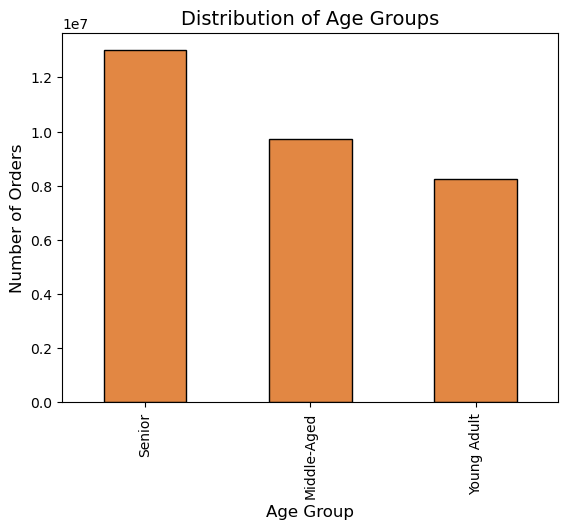

In [96]:
# Creating bar chart for 'age group' 
bar_age_group = df_merged['age_group'].value_counts()
bar_age_group = bar_age_group.plot(kind='bar', color='#e28743', edgecolor='k')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)  
plt.title('Distribution of Age Groups', fontsize=14)
plt.show()

In [97]:
# Exporting bar chart 
bar_age_group.figure.figure.savefig(
    os.path.join(path, 'Analysis', 'Visualizations', '4.10_age_groups_bar.png'),
    bbox_inches='tight'  # Adjust the extent of the saved figure to include all content
)

### Income Level Visualization

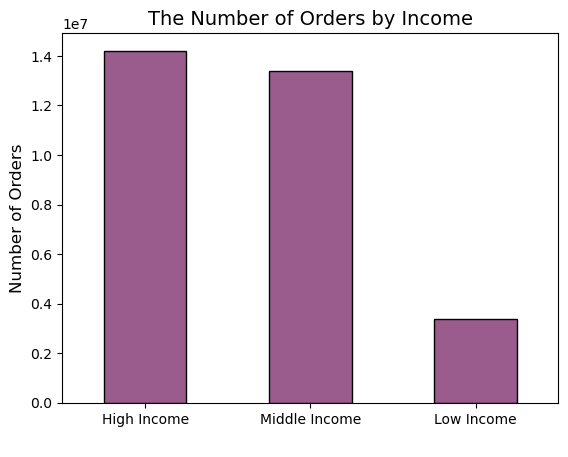

In [51]:
#creating bar chart for income levels

bar_income_stat = df_merged['income_level'].value_counts()
bar_income_stat = bar_income_stat.plot(kind='bar', color='#9a5c8c', edgecolor= 'k')
plt.xlabel(" ", fontsize=12)
plt.xticks(rotation=0)
plt.ylabel('Number of Orders', fontsize=12)  
plt.title('The Number of Orders by Income', fontsize=14)
plt.show()

In [52]:
# Exporting bar chart 
bar_income_stat.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', '4.10_income_bar.png'))

### Departments Visualization

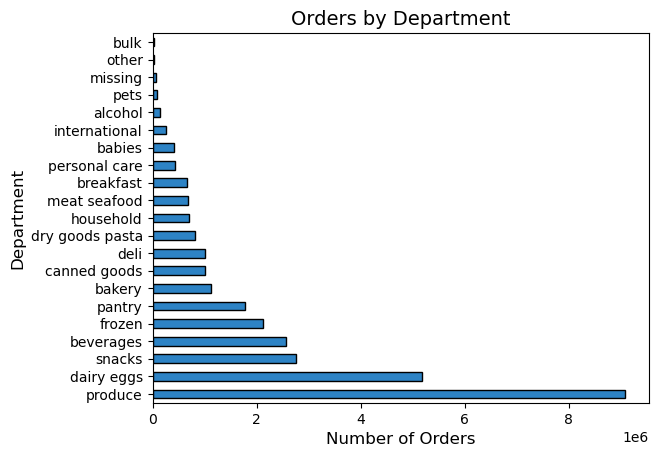

In [53]:
# bar chart listing out depts and their number of orders
bar_dept = df_merged['department'].value_counts()
bar_dept = bar_dept.plot(kind='barh', color='#2d83c5', edgecolor= 'k')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Department', fontsize=12)  
plt.title('Orders by Department', fontsize=14)
plt.show()

In [54]:
# Exporting bar chart with adjusted settings
bar_dept.figure.savefig(
    os.path.join(path, 'Analysis', 'Visualizations', '4.10_dept_bar.png'),
    bbox_inches='tight'  # Adjust the extent of the saved figure to include all content
)

### Number of Dependents Visualization

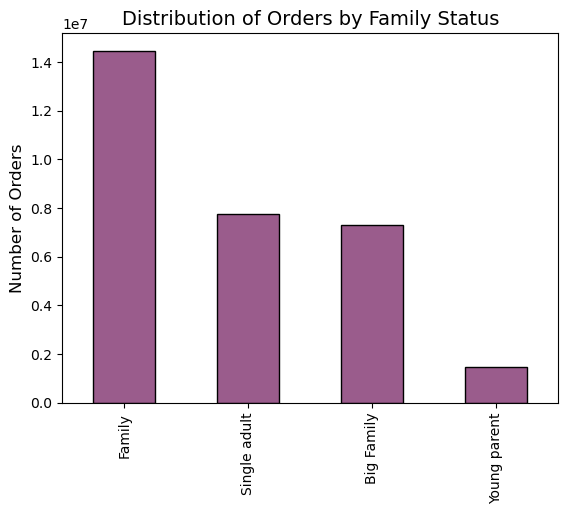

In [55]:
# Bar graph for number of dependents
bar_dependents = df_merged['family_status'].value_counts()
bar_dependents = bar_dependents.plot(kind='bar', color='#9a5c8c', edgecolor= 'k')
plt.xlabel('', fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)  
plt.title('Distribution of Orders by Family Status', fontsize=14)
plt.show()

In [89]:
# Exporting bar chart 
bar_dependents.figure.savefig(
    os.path.join(path, 'Analysis', 'Visualizations', '4.10_dependents_bar.png'),
    bbox_inches='tight'  # Adjust the extent of the saved figure to include all content
)

# Step 7 - Aggregate the Max, Mean, and Min Variables

#### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [57]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30964564 entries, 0 to 30964563
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   gender                  category
 2   state                   category
 3   age                     int8    
 4   date_joined             category
 5   number_of_dependants    int8    
 6   marital_status          category
 7   income                  int32   
 8   order_id                int32   
 9   order_number            int8    
 10  orders_day_of_week      int8    
 11  order_hour_of_day       int8    
 12  days_since_prior_order  float32 
 13  product_id              int32   
 14  add_to_cart_order       int16   
 15  reordered               int8    
 16  product_name            category
 17  department_id           int8    
 18  prices                  float32 
 19  price_range             category
 20  busiest_days            category
 21  max_or

### Age Groups

In [58]:
# Group by 'age_group' and compute max, min, and mean values for expenditure
age_group_expenditure_aggregations = df_merged.groupby('age_group')['prices'].agg(['max', 'min', 'mean'])

In [59]:
# Rename the columns for clarity
age_group_expenditure_aggregations.columns = ['max_spending', 'min_spending', 'mean_spending']

In [60]:
# Display the aggregated data for expenditure by age group
age_group_expenditure_aggregations

,max_spending,min_spending,mean_spending
age_group,,,
Middle-Aged,25.0,1.0,7.790195
Senior,25.0,1.0,7.794445
Young Adult,25.0,1.0,7.784978


 It seems that the maximum spending is the same for all age groups, as is the minimum spending. The mean spending varies slightly but is quite similar between the age groups. This information provides insights into the spending behavior within different age groups, but it seems that the spending statistics are relatively consistent among the groups in your dataset.

In [61]:
# Group by 'age_group' and compute max, min, and mean values for usage frequency
age_group_usage_frequency = df_merged.groupby('age_group')['days_since_prior_order'].agg(['max', 'min', 'mean'])

In [62]:
# Rename the column for clarity
age_group_usage_frequency.columns = ['max_usage', 'min_usage', 'mean_usage']

In [63]:
# Display the aggregated data for usage frequency by age group
age_group_usage_frequency

,max_usage,min_usage,mean_usage
age_group,,,
Middle-Aged,30.0,0.0,10.795478
Senior,30.0,0.0,10.812868
Young Adult,30.0,0.0,10.823742


Similar to the expenditure aggregations, the maximum and minimum values are the same for all age groups, with the mean varying slightly. The changes between each are not drastic, though.

### Income Levels

In [64]:
# Group by 'income_level' and compute max, min, and mean values for expenditure
income_level_expenditure_aggregations = df_merged.groupby('income_level')['prices'].agg(['max', 'min', 'mean'])

In [65]:
# Rename the columns for clarity
income_level_expenditure_aggregations.columns = ['max_spending', 'min_spending', 'mean_spending']

In [66]:
# Display the aggregated data for expenditure by income level
income_level_expenditure_aggregations

,max_spending,min_spending,mean_spending
income_level,,,
High Income,25.0,1.0,7.953438
Low Income,25.0,1.0,6.707347
Middle Income,25.0,1.0,7.889856


Similar to the age groups, the maximum and minimum spending values are the same for all income levels, indicating that these spending statistics are consistent across income groups. However, the mean spending varies slightly among the income levels. Customers in the "High Income" category have the highest mean spending, while customers in the "Low Income" category have the lowest mean spending.

In [67]:
# Group by 'income_level' and compute max, min, and mean values for usage frequency
income_level_usage_frequency = df_merged.groupby('income_level')['days_since_prior_order'].agg(['max', 'min', 'mean'])

In [68]:
# Rename the columns for clarity
income_level_usage_frequency.columns = ['max_usage', 'min_usage', 'mean_usage']

In [69]:
# Display the aggregated data for usage frequency by income level
income_level_usage_frequency

,max_usage,min_usage,mean_usage
income_level,,,
High Income,30.0,0.0,10.769662
Low Income,30.0,0.0,11.175807
Middle Income,30.0,0.0,10.762110


Similar to the income level expenditure aggregations, the maximum and minimum remained the same for each income level, and the number are the same as the age group frequency. Similarly to all the prior aggregations, the mean varied very slightly. 

# Step 8: Comparing Customer Profiles with Regions and Departments

#### Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [70]:
# Checking the relationship of age group & income levels of customers profile in different regions
profile_age_region = df_merged.groupby('region')[['income_level','age_group']].value_counts().reset_index(name='count')

In [71]:
profile_age_region

,region,income_level,age_group,count
0,Midwest,High Income,Senior,2147232
1,Midwest,Middle Income,Young Adult,1536816
2,Midwest,High Income,Middle-Aged,1185950
3,Midwest,Middle Income,Middle-Aged,897605
4,Midwest,Middle Income,Senior,643235
5,Midwest,Low Income,Young Adult,308146
6,Midwest,Low Income,Senior,241904
7,Midwest,Low Income,Middle-Aged,233714
8,Midwest,High Income,Young Adult,66911
9,Northeast,High Income,Senior,1621273


In [72]:
# Checking age group orders by regions
region_age = pd.crosstab(df_merged['age_group'],df_merged['region'], dropna = False)

In [73]:
region_age

region,Midwest,Northeast,South,West
age_group,,,,
Middle-Aged,2317269,1686498,3227128,2493343
Senior,3032371,2310112,4315553,3339995
Young Adult,1911873,1468075,2768458,2093889


In [74]:
# Checking income level by regions
region_income = pd.crosstab(df_merged['income_level'],df_merged['region'], dropna = False)

In [75]:
region_income

region,Midwest,Northeast,South,West
income_level,,,,
High Income,3400093,2516484,4663571,3626880
Low Income,783764,587137,1142572,849081
Middle Income,3077656,2361064,4504996,3451266


# Step 9: Create Charts 

#### Produce suitable charts to illustrate your results and export them in your project folder.

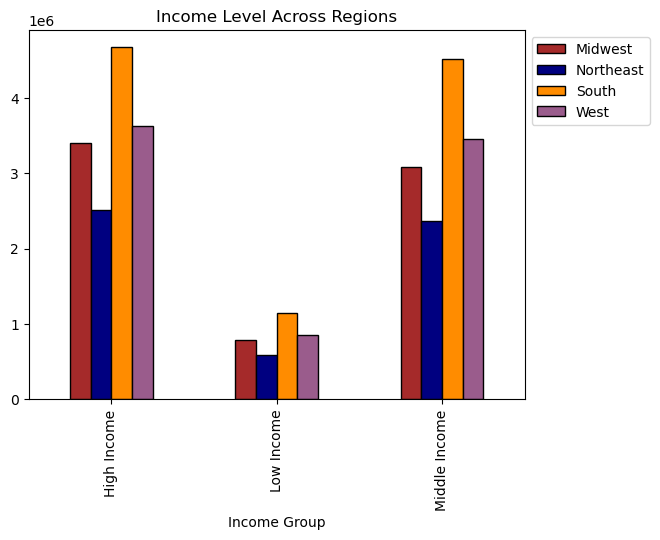

In [76]:
# Bar chart of income level and region
bar_region_income = region_income.plot.bar(color= ['brown', 'navy', 'darkorange', '#9a5c8c'], title = 'Income Level Across Regions', edgecolor='k')
plt.xlabel("Income Group")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [92]:
# Export bar chart
bar_region_income.figure.savefig(
    os.path.join(path, 'Analysis', 'Visualizations', '4.10_bar_region_income.png'),
    bbox_inches='tight'  # Adjust the extent of the saved figure to include all content
)

In [78]:
# create df to create stacked bar chart to see relationship between departments and number of dependents
dependents_department = df_merged.groupby(['department', 'family_status']).size().unstack(fill_value=0)

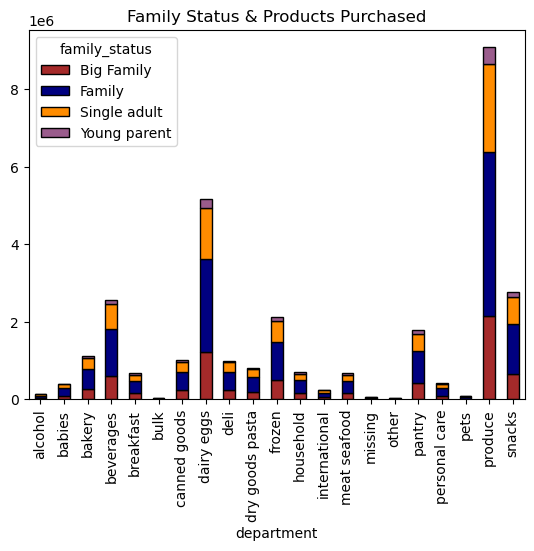

In [79]:
#create stacked bar graph
stacked_dependent_dept = dependents_department.plot.bar(stacked = True, title = 'Family Status & Products Purchased', color= ['brown','navy', 'darkorange', '#9a5c8c'], edgecolor='k') 

In [93]:
# Export stacked bar chart
stacked_dependent_dept.figure.savefig(
    os.path.join(path, 'Analysis', 'Visualizations', '4.10_stacked_customerprofile_department.png'),
    bbox_inches='tight'  # Adjust the extent of the saved figure to include all content
)

In [81]:
# Create a crosstab to count the occurrences of age categories in each department
cross_tab_age_group = pd.crosstab(df_merged['department'], df_merged['age_group'])

<Figure size 1200x600 with 0 Axes>

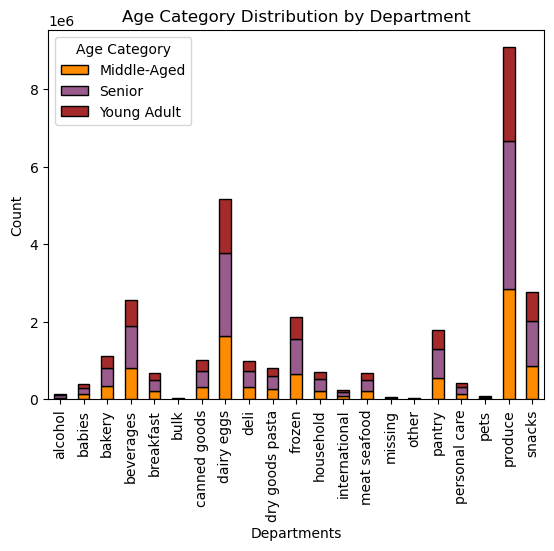

In [82]:
# Creating a stacked bar chart
plt.figure(figsize=(12, 6))
stacked_cross_tab_age_group = cross_tab_age_group.plot(kind='bar', stacked=True, title='Age Category Distribution by Department', color= ['darkorange', '#9a5c8c', 'brown'], edgecolor='k')
plt.xlabel('Departments')
plt.ylabel('Count')
plt.legend(title='Age Category')

In [90]:
# Exporting stacked bar chart
stacked_cross_tab_age_group.figure.savefig(
    os.path.join(path, 'Analysis', 'Visualizations', '4.10_stacked_age_group_dept.png'),
    bbox_inches='tight'  # Adjust the extent of the saved figure to include all content
)

In [84]:
# Checking family status by region
family_by_region = pd.crosstab(df_merged['family_status'],df_merged['region'], dropna = False)

In [85]:
family_by_region

region,Midwest,Northeast,South,West
family_status,,,,
Big Family,1671542,1291928,2425559,1895018
Family,3415720,2561845,4798190,3683909
Single adult,1822816,1354482,2581933,1980450
Young parent,351435,256430,505457,367850


Text(0.5, 1.0, 'Family Status Distribution by Region')

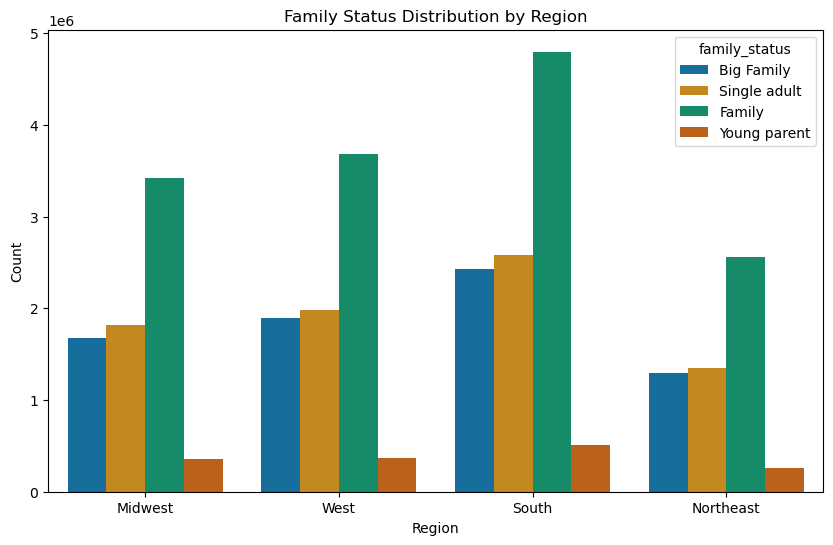

In [86]:
# Create a countplot to visualize the distribution of family status in each region
plt.figure(figsize=(10, 6))
countplot_family_by_region = sns.countplot(x='region', hue='family_status', data=df_merged, palette='colorblind')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Family Status Distribution by Region')

It seems families with married parents and less than or equal to two dependents seem to have the most orders, in all regions.

In [87]:
# exporting countplot bar chart
countplot_family_by_region.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', '4.10_countplot_family_by_region.png'))

# Step 10: Export Your Final Data Set

In [88]:
# Exporting data
df_merged.to_pickle(os.path.join(path, 'Data', 'Prepared Data', '4.10_final_ords_prods_dept_merged.pkl'))